# Collections

Collection Categories
- Interfaces that define standard collection protocols
- Ready-to-use collection classes (lists, dictionaries, etc.)
- Base classes for writing application-specific collections


### Enumeration

What makes the ability to Enumeration?  
`IEnumerable` and `IEnumerator`, and their generic counterparts

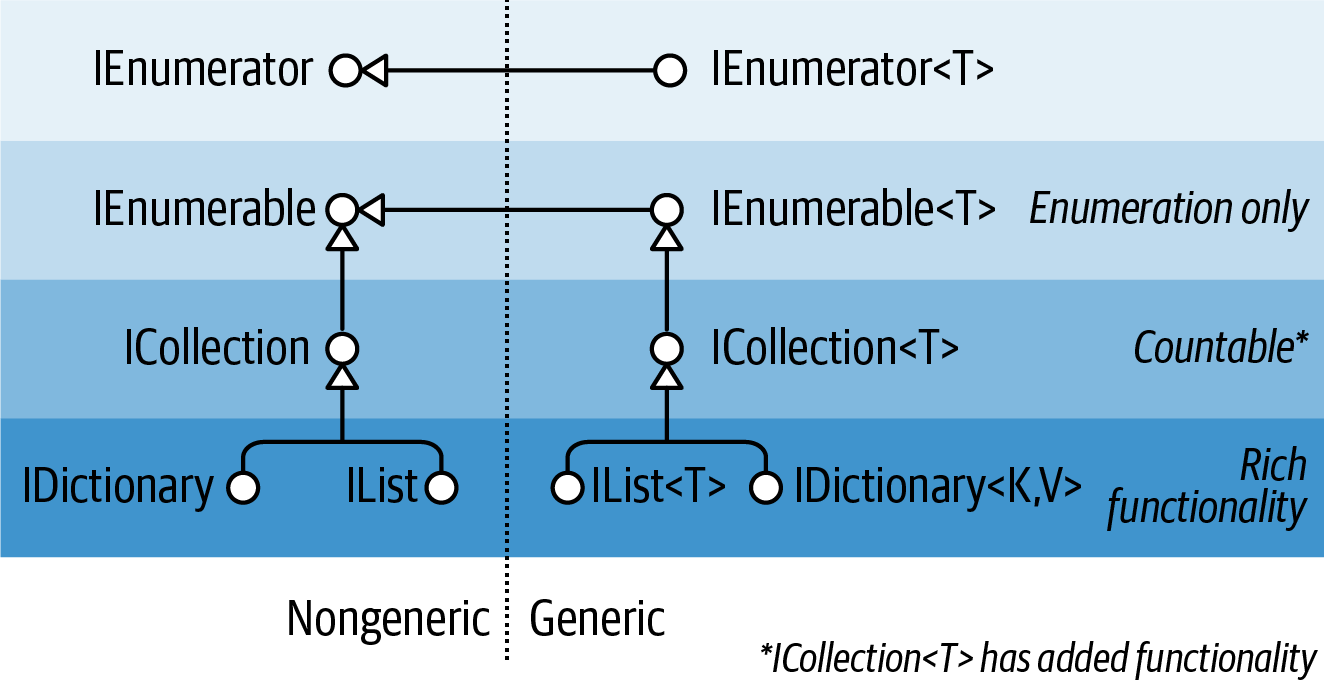

In [ ]:
public interface IEnumerator
{
    bool MoveNext();
    object Current { get; }
    void Reset();
}

In [ ]:
public interface IEnumerable
{
    IEnumerator GetEnumerator();
}

In [ ]:
var address = new Address { City = "kerman", State = "kerman", PostalCode = "123456" };
foreach (var item in address)
    Console.WriteLine(item);

public class Address : IEnumerable
{
    public string City { get; set; } = string.Empty;
    public string State { get; set; } = string.Empty;
    public string PostalCode { get; set; } = string.Empty;

    public IEnumerator GetEnumerator()
    {
        yield return City;
        yield return State;
        yield return PostalCode;
    }
}

So, an object can be `Enumerable` , which implements the `IEnumerable interface`

`foreach` is actually equivalent to the code below

In [ ]:
IEnumerator rator = address.GetEnumerator();

while (rator.MoveNext())
{
    string str = (string) rator.Current;
    Console.WriteLine(str);
}

In [ ]:
//Generic version

public interface IEnumerator<T> : IEnumerator, IDisposable
{
    T Current { get; }
}
public interface IEnumerable<T> : IEnumerable
{
    IEnumerator<T> GetEnumerator();
}

In [ ]:
var address = new AddressGeneric { City = "kerman", State = "kerman", PostalCode = "123456" };
foreach (var item in address)
    Console.WriteLine(item);

public class AddressGeneric : IEnumerable<string>
{
    public string City { get; set; } = string.Empty;
    public string State { get; set; } = string.Empty;
    public string PostalCode { get; set; } = string.Empty;

    // پیاده‌سازی جنریک GetEnumerator که IEnumerator<string> برمی‌گرداند
    public IEnumerator<string> GetEnumerator()
    {
        yield return City;
        yield return State;
        yield return PostalCode;
    }

    // پیاده‌سازی غیرجنریک IEnumerable.GetEnumerator
    // این متد فقط برای سازگاری با IEnumerable است.
    IEnumerator IEnumerable.GetEnumerator()
    {
        // اینجا می‌توانید به سادگی متد جنریک GetEnumerator را فراخوانی کنید
        return this.GetEnumerator();
    }
}


in C#, `array` implement `IEnumerable<T>` by default, where `T` is type of array elements

IEnumerator<T> `inherits` from IDisposable.  

This causes the `IEnumerator` to `release` resources when it is done

### implement IEnumerable<T>

In [ ]:
//1- returning the wrapped collection’s enumerator
public class MyCollection : IEnumerable<int>
{
    private List<int> _innerList = new List<int> { 1, 2, 3, 4, 5 };

    public IEnumerator<int> GetEnumerator()
    {
        return _innerList.GetEnumerator();
    }

    IEnumerator IEnumerable.GetEnumerator()
    {
        return GetEnumerator();
    }
}


In [ ]:
//2- Via an iterator using yield return
public class MyNumbers : IEnumerable<int>
{
    public IEnumerator<int> GetEnumerator()
    {
        for (int i = 0; i < 5; i++)
        {
            yield return i;
        }
    }

    IEnumerator IEnumerable.GetEnumerator()
    {
        return GetEnumerator();
    }
}

In [ ]:
//3- By instantiating your own IEnumerator/IEnumerator<T> implementation
public class MyCustomCollection : IEnumerable<int>
{
    private int[] _items = { 1, 2, 3, 4, 5 };

    public IEnumerator<int> GetEnumerator()
    {
        return new CustomEnumerator(_items);
    }

    IEnumerator IEnumerable.GetEnumerator()
    {
        return GetEnumerator();
    }

    private class CustomEnumerator : IEnumerator<int>
    {
        private int[] _items;
        private int _position = -1;

        public CustomEnumerator(int[] items)
        {
            _items = items;
        }

        public int Current
        {
            get
            {
                return _items[_position];
            }
        }

        object IEnumerator.Current => Current;

        public void Dispose() { }

        public bool MoveNext()
        {
            _position++;
            return (_position < _items.Length);
        }

        public void Reset()
        {
            _position = -1;
        }
    }
}

## The ICollection and IList Interfaces 351

`IEnumerable<T>` (and IEnumerable)
Provides minimum functionality (`enumeration only`)

`ICollection<T>` (and ICollection)
Provides medium functionality (e.g., the `Count` property)

`IList<T>/IDictionary<K,V>` and their nongeneric versions
Provide maximum functionality (including `random` access by `index/key`)

In [ ]:
// difference between generic and nongeneric

public static void NonGenericListExample()
{
    IList list = new ArrayList();
    list.Add(1); // اضافه کردن یک عدد صحیح
    list.Add("string"); // اضافه کردن یک رشته
    list.Add(new DateTime(2024, 1, 1)); // اضافه کردن یک تاریخ

    foreach (var item in list)
    {
        Console.WriteLine($"{item} - Type: {item.GetType().Name}");
    }
}

public static void GenericListExample()
{
    IList<int> list = new List<int>();
    list.Add(1); // اضافه کردن یک عدد صحیح
    // list.Add("string"); // خطا: نوع string با نوع مورد انتظار int مطابقت ندارد
    // list.Add(new DateTime(2024, 1, 1)); // خطا: نوع DateTime با نوع مورد انتظار int مطابقت ندارد

    foreach (var item in list)
    {
        Console.WriteLine($"{item} - Type: {item.GetType().Name}");
    }
}

`IList<T>` does not extend `IList`, `ICollection<T>` does not extend `ICollection`  
`IDictionary<TKey, TValue>` does not extend `IDictionary`.  

because generics came later.

`IList<T>` inherits from `ICollection<T>`

`Collection<T>` inherits from `IList<T>` , خیلی جالب شد

<div dir="rtl">
ممکن است انتظار داشته باشید که کلاس‌های متناظر با این اینترفیس‌ها، یعنی List<T> و Collection<T>, به ترتیب دارای عملکرد و قابلیت‌های متفاوتی باشند که List<T> پیشرفته‌تر و کامل‌تر از Collection<T> باشد. با این حال، این حتماً صحیح نیست.

</div>

In [ ]:
//all contracts define in System.Collections.Generic
public interface IEnumerable{}
public interface ICollection : IEnumerable{}
public interface IList : ICollection, IEnumerable {}

public interface IEnumerable<out T> : IEnumerable{}
public interface IReadOnlyCollection<out T> : IEnumerable<T>, IEnumerable{}
public interface ICollection<T> : IEnumerable<T>, IEnumerable{}
public interface IReadOnlyList<out T> : IEnumerable<T>, IEnumerable, IReadOnlyCollection<T>{}
public interface IList<T> : ICollection<T>, IEnumerable<T>, IEnumerable{}

In [ ]:
using System.Collections.Generic;

//implemented in System.Collections.ObjectModel
public class List<T> : IList<T>, ICollection<T>, IEnumerable<T>, IEnumerable, IList, ICollection, IReadOnlyList<T>, IReadOnlyCollection<T> {}
public class Collection<T> : ICollection<T>, IEnumerable<T>, IEnumerable, IList<T>, IReadOnlyCollection<T>, IReadOnlyList<T>, ICollection, IList {}

<h3 dir="rtl"> تفاوت بین List<T> , Collection<T> </h3>
<p dir= "rtl">
List<T> بهینه‌سازی شده برای کارایی است. این کلاس برای استفاده مستقیم و به عنوان یک کالکشن دینامیک با دسترسی سریع به عناصر طراحی شده است. List<T> به طور مستقیم روی یک آرایه پیاده‌سازی شده و بهینه‌سازی‌های خاصی برای عملیات‌های افزودن، حذف و دسترسی به عناصر دارد.
</p>

<p dir= "rtl">
Collection<T> به عنوان یک پایه کلاس برای ایجاد کالکشن‌های سفارشی طراحی شده است. این کلاس انعطاف‌پذیری بیشتری نسبت به List<T> دارد زیرا توسعه‌دهندگان می‌توانند رفتارهای پیش‌فرض مانند اضافه کردن، حذف یا به‌روزرسانی عناصر را با اورراید کردن متدهایی مانند InsertItem, RemoveItem, و SetItem تغییر دهند.
</p>

In [ ]:
public interface ICollection<T> : IEnumerable<T>, IEnumerable
{
    int Count { get; }
    bool Contains(T item);
    void CopyTo(T[] array, int arrayIndex);
    bool IsReadOnly { get; }
    void Add(T item);
    bool Remove(T item);
    void Clear();
}

public interface ICollection : IEnumerable
{
    int Count { get; }
    bool IsSynchronized { get; }
    object SyncRoot { get; }
    void CopyTo (Array array, int index);
}

If implementing a `read-only` ICollection<T>, the `Add`, `Remove`, and `Clear` methods should throw a `NotSupportedException`.

In [ ]:
public interface IList<T> : ICollection<T>, IEnumerable<T>, IEnumerable
{
    T this [int index] { get; set; }
    int IndexOf (T item);
    void Insert (int index, T item);
    void RemoveAt (int index);
}

public interface IList : ICollection, IEnumerable
{
    object this[int index] { get; set }
    bool IsFixedSize { get; }
    bool IsReadOnly { get; }
    int Add(object value);
    void Clear();
    bool Contains(object value);
    int IndexOf(object value);
    void Insert(int index, object value);
    void Remove(object value);
    void RemoveAt(int index);
}

`C# arrays` also implement both the generic and nongeneric `ILists` (although the methods that `add` or `remove` elements are hidden via explicit interface implementation and throw a NotSupportedException if called).

In [ ]:
IList list = new int[10];

list.Add(1); // Error: System.NotSupportedException: Collection was of a fixed size.

In [ ]:
public interface IReadOnlyCollection<out T> : IEnumerable<T>, IEnumerable
{
    int Count { get; }
}
public interface IReadOnlyList<out T> : IReadOnlyCollection<T>,
IEnumerable<T>, IEnumerable
{
    T this[int index] { get; }
}

### Covariance and Contravariance

In [4]:
//Covariance

var strings = new List<string>{"one", "two"};
strings.Add("three");

var ilistStrings = (IList<string>)strings;
ilistStrings.Add("four");

//var objectList = (IList<object>) strings;// get InvalidCastException
//why? see below example
//objectList.Add(42); // now we have list of strings and int. this illegal

//but consider below code

var objectSequence = (IEnumerable<object>) strings;


In [ ]:
public interface IEnumerable<out T> : IEnumerable
{
    IEnumerator<T> GetEnumerator();
}

//only key concept is `out`
//runtime is sure, we can not modify this variable